# SMOGN (0.1.0): Usage
---
## Example 3: Advanced


## Installation

First, we install SMOGN from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [0]:
## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

## Dependencies
Next, we load the required dependencies. Here we import `smogn` to later apply Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise. In addition, we use `pandas` for data handling, and `seaborn` to visualize our results.

In [1]:
## load dependencies
import smogn
import pandas
import seaborn

## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. In this case, we name our training set `housing`



In [2]:
## load data
housing = pandas.read_csv(

    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv'
)


## Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise
Here we cover the focus of this example. We call the `smoter` function from this package (`smogn.smoter`) and satisfy all of the available arguments for manual operation:  `data`, `y`, `samp_method`, `drop_na_col`, `drop_na_row`, `replace`, `k`, `rel_thres`, `rel_method`, `rel_ctrl_pts_rg`

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `housing` training set with follow input: `data = housing`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'SalePrice'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input: `y = 'SalePrice'` 

* The `k` argument takes a positive integer less than 𝑛, where 𝑛 is the sample size. `k` specifies the number of neighbors to consider for interpolation used in over-sampling. In this example, we input `7` to consider 2 additional neighbors (default is `5`) with the following input: `k = 7`

* The `pert` argument takes a real number between 0 and 1. It represents the amount of perturbation to apply to the introduction of Gaussian Noise. In this example, we input `0.04` to increase the noise generated by synthetic examples where applicable (default is `0.02`). We utilize the following input: `pert = 0.04`

* The `samp_method` argument takes a string, either `'balance'` or `'extreme'`. If `'balance'` is specified, less over/under-sampling is conducted. If `'extreme'` is specified, more over/under-sampling is conducted. In this case, we input `'balance'` (default is `'balance'`) with the following input: `samp_method = 'balance'`

* The `drop_na_col` and `drop_na_row` arguments take a boolean. They specify whether or not to automatically remove features (columns) and observations (rows) that contain missing values (default is `True` for both). In this example, we make the argument explicit with the following inputs: `drop_na_col = True` and `drop_na_row = True`

* The `replace` argument takes a boolean. It specifies whether or not to utilize replacement in under-sampling (default is `False`). In this example, we make the argument explicit with the following input: `replace = False`

* The `rel_thres` argument takes a real number between 0 and 1. It specifies the threshold of rarity. The higher the threshold, the higher the over/under-sampling boundary. The inverse is also true, where the lower the threshold, the lower the over/under-sampling boundary. In this example, we dramatically reduce the boundary to `0.10` (default is `0.50`) with the following input: `rel_thres = 0.10`

* The `rel_method` argument takes a string, either `'auto'` or `'manual'`. It specifies how relevant or rare "minority" values in `y` are determined. If `'auto'` is specified, "minority" values are automatically determined by box plot extremes. If `'manual'` is specified, "minority" values are determined by the user. In this example, we input `'manual'` with the following input: `rel_method = 'manual'`

* The `rel_ctrl_pts_rg` argument takes a 2d array (matrix). It is used to manually specify the regions of interest or rare "minority" values in `y`. The first column indicates the `y` values of interest, the second column indicates a mapped value of relevance, either `0` or `1`, where `0` is the least relevant and `1` is the most relevant, and the third column is indicative. It will be adjusted afterwards, use `0` in most cases.

In [3]:
## specify phi relevance values
rg_mtrx = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 0, 0],  ## under-sample
]

In [4]:
## conduct smogn
housing_smogn = smogn.smoter(
    
    ## main arguments
    data = housing,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

r_index: 100%|##########| 126/126 [00:00<00:00, 243.44it/s]


**Note:**

In this example, the regions of interest or rare "minority" values within the response variable `y` are manually determined.

The specified relevance values mapped to `1` are considered "minorty" values and are over-sampled. The specified relevance values mapped to `0` are considered "majority" values and are under-sampled.

This can also be automatically determined by specifying the argument `rel_method = 'auto'`. More information in this regard can be found within the function's doc string, as well as in **Example 1: Beginner** and **Example 2: Intermediate**.

## Results
After conducting Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set decreased from 1460 to 1309, while the number of features (columns) also decreased from 81 to 62. 

Recall that `smogn.smoter` automatically removes features containing missing values. In this case, 19 features contained missing values and were therefore omitted.

The reduction in observations were a result of under-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.



In [5]:
## dimensions - original data 
housing.shape

(1460, 81)

In [6]:
## dimensions - modified data
housing_smogn.shape

(1309, 62)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`smogn.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has changed, where the distribution of the response variable has *skewed left* when compared to the original training set.

In [7]:
## box plot stats - original data 
smogn.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [8]:
## box plot stats - modified data
smogn.box_plot_stats(housing_smogn['SalePrice'])['stats']

array([ 34250.,  87000., 104654., 163900., 278000.])

Plotting the results of both the original and modified training sets, the *skewed left* distribution of the response variable in the modified training set becomes more evident.

In this example, SMOGN over-sampled observations whose `'SalePrice'` was manually specified near the lowest values (those considered "minority") and under-sampled those manually specified as less interesting (those considered "majority").

This is perhaps most useful when the `y` values of interest in predicting within a given dataset are known by a domain expert.



<Axes: xlabel='SalePrice', ylabel='Density'>

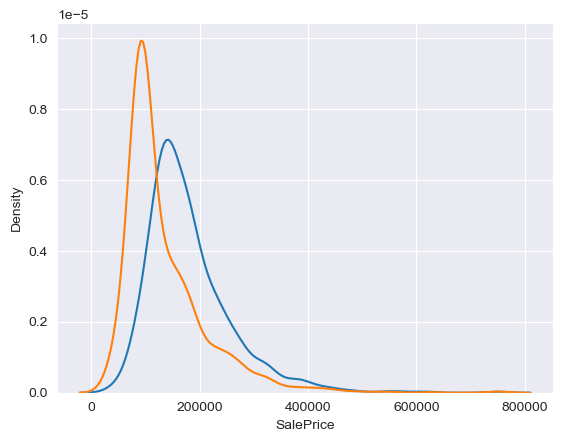

In [9]:
## distribution plot
seaborn.kdeplot(housing['SalePrice'], label = "Original")
seaborn.kdeplot(housing_smogn['SalePrice'], label = "Modified")

## Conclusion
In this example, we covered advanced usage of SMOGN. We utilized the Ames Housing Dataset to conduct Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise with detailed manual specification.

SMOGN over-sampled "minority" values and under-sampled "majority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.

More examples, where additional features of SMOGN are explored can be found within the packages example directory. Developer updates are available in the package's Github repository at https://github.com/nickkunz/smogn. Official releases are available in the Python Package Index and can be found at https://pypi.org/project/smogn.






## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education 19(3). https://doi.org/10.1080/10691898.2011.11889627.

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index.
https://pypi.org/project/smogn. 